Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
score:0.8044692737430168


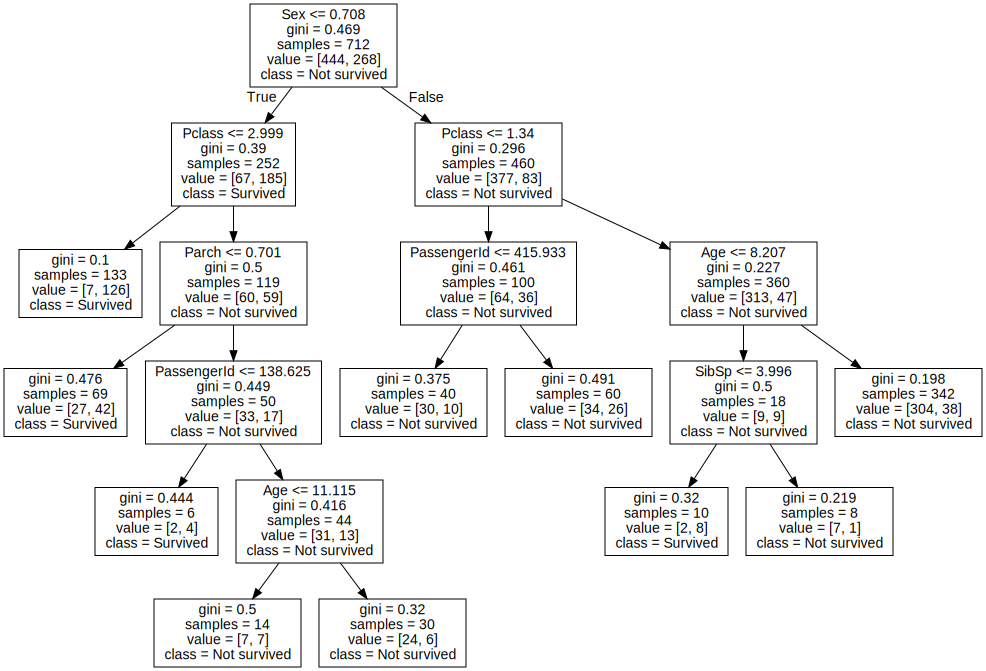

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
drive.mount('/content/gdrive')
dataset=pd.read_csv("/content/gdrive/MyDrive/Gomycode/titanic-passengers.csv",sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree_classifier = tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
tree_classifier.fit(x_train, y_train)   #fitting our model
y_pred=tree_classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

#Decision tree visualisation
all_features=list(x.columns)
dot_data=tree.export_graphviz(tree_classifier, out_file= None,
                              feature_names = all_features,
                              class_names = ['Not survived', 'Survived'],)
graph=graphviz.Source(dot_data)
graph.render("data")
graph
#tree.plot_tree(tree_classifier)

#dtree=tree.DecisionTreeClassifier(criterion="gini",splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)